notebook that evaluates the deployed model

In [68]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    classification_report, 
    roc_auc_score, 
    confusion_matrix, 
    precision_score,
    roc_curve,
)
from matplotlib import pyplot as plt
%matplotlib inline

In [59]:
# Read the test set
df = pd.read_csv("data/test_1.csv", index_col="observation_id")

# convert the dictionaries to dataframes
list_json = [eval(row) for row in df.observation.values]
obs_df = pd.DataFrame(list_json)

# merge with the predicted and true outcome
outcomes_df = df[["predict", "true_class", "proba"]]

predictions_df = pd.merge(obs_df, outcomes_df, left_on="observation_id", right_on="observation_id")
predictions_df.set_index("observation_id", inplace=True)

In [60]:
predictions_df

,Type,Date,Part of a policing operation,Latitude,Longitude,Gender,Age range,Officer-defined ethnicity,Legislation,Object of search,station,predict,true_class,proba
observation_id,,,,,,,,,,,,,,
cf46ed6e-e6bb-4bc9-959d-ef2e5a8162a0,Person search,2020-01-01T01:45:00+00:00,False,NaN,NaN,Male,18-24,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,nottinghamshire,0,0,0.417262
3601e51b-f40a-4466-b884-d9284497462c,Person search,2020-01-01T02:53:14+00:00,None,NaN,NaN,Male,18-24,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,city-of-london,0,0,0.448492
95dae6a9-6775-4862-815f-61cf1b586384,Person search,2020-01-01T04:43:00+00:00,True,NaN,NaN,Female,18-24,Mixed,Misuse of Drugs Act 1971 (section 23),Controlled drugs,nottinghamshire,1,0,0.537857
467c4766-3a3f-489d-bf09-5a698748499e,Person search,2020-01-01T05:08:30+00:00,None,51.512598,-0.084967,Male,10-17,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,city-of-london,1,0,0.508692
c6d2de91-445e-40f7-9e5f-9d572f8bb232,Person search,2020-01-01T05:10:30+00:00,None,51.512598,-0.084967,Male,10-17,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,city-of-london,1,0,0.508692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
e8055287-1a71-4976-9b98-3b960c00421d,Person and Vehicle search,2020-07-02T20:21:00+00:00,True,NaN,NaN,Male,18-24,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,nottinghamshire,1,0,0.569119
6b3dcd45-2403-4460-a8d8-b4f2e5ddc3ae,Person search,2020-07-03T09:19:37+00:00,None,51.517244,-0.080376,Male,over 34,Asian,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,city-of-london,0,1,0.395154
b81e0607-3231-41ad-9807-86e754f0a4bd,Person search,2020-07-03T12:13:00+00:00,True,NaN,NaN,Male,25-34,Mixed,Misuse of Drugs Act 1971 (section 23),Controlled drugs,nottinghamshire,1,1,0.534407


In [35]:
predictions_df.isna().sum()

Type                               0
Date                               0
Part of a policing operation    1797
Latitude                        2526
Longitude                       2526
Gender                             0
Age range                          0
Officer-defined ethnicity          0
Legislation                        1
Object of search                   0
station                            0
predict                            0
true_class                         0
dtype: int64

In [36]:
predictions_df.groupby("true_class").count()

,Type,Date,Part of a policing operation,Latitude,Longitude,Gender,Age range,Officer-defined ethnicity,Legislation,Object of search,station,predict
true_class,,,,,,,,,,,,
0,2887,2887,1681,963,963,2887,2887,2887,2886,2887,2887,2887
1,1113,1113,522,511,511,1113,1113,1113,1113,1113,1113,1113


In [37]:
predictions_df.groupby("predict").count()

,Type,Date,Part of a policing operation,Latitude,Longitude,Gender,Age range,Officer-defined ethnicity,Legislation,Object of search,station,true_class
predict,,,,,,,,,,,,
0,1322,1322,504,722,722,1322,1322,1322,1321,1322,1322,1322
1,2678,2678,1699,752,752,2678,2678,2678,2678,2678,2678,2678


how many observations we had per station?

In [52]:
predictions_df.groupby(["station", "true_class"]).count()

Type  Date  Part of a policing operation  \
station         true_class                                             
cambridgeshire  0             26    26                             0   
                1              5     5                             0   
city-of-london  0            964   964                             0   
                1            308   308                             0   
durham          0            216   216                             0   
                1            278   278                             0   
nottinghamshire 0           1681  1681                          1681   
                1            522   522                           522   

                            Latitude  Longitude  Gender  Age range  \
station         true_class                                           
cambridgeshire  0                 26         26      26         26   
                1                  5          5       5          5   
city-of-london  0                721        721     964        964   
                1                228        228     308        308   
durham          0                216        216     216        216   
                1                278        278     278        278   
nottinghamshire 0                  0          0    1681       1681   
                1                  0          0     522        522   

                            Officer-defined ethnicity  Legislation  \
station         true_class                                           
cambridgeshire  0                                  26           26   
                1                                   5            5   
city-of-london  0                                 964          964   
                1                                 308          308   
durham          0                                 216          216   
                1                                 278          278   
nottinghamshire 0                                1681         1680   
                1                                 522          522   

                            Object of search  predict  
station         true_class                             
cambridgeshire  0                         26       26  
                1                          5        5  
city-of-london  0                        964      964  
                1                        308      308  
durham          0                        216      216  
                1                        278      278  
nottinghamshire 0                       1681     1681  
                1                        522      522

In [54]:
predictions_df.groupby(["station", "predict"]).count()

Type  Date  Part of a policing operation  Latitude  \
station         predict                                                       
cambridgeshire  0           8     8                             0         8   
                1          23    23                             0        23   
city-of-london  0         566   566                             0       470   
                1         706   706                             0       479   
durham          0         244   244                             0       244   
                1         250   250                             0       250   
nottinghamshire 0         504   504                           504         0   
                1        1699  1699                          1699         0   

                         Longitude  Gender  Age range  \
station         predict                                 
cambridgeshire  0                8       8          8   
                1               23      23         23   
city-of-london  0              470     566        566   
                1              479     706        706   
durham          0              244     244        244   
                1              250     250        250   
nottinghamshire 0                0     504        504   
                1                0    1699       1699   

                         Officer-defined ethnicity  Legislation  \
station         predict                                           
cambridgeshire  0                                8            8   
                1                               23           23   
city-of-london  0                              566          566   
                1                              706          706   
durham          0                              244          244   
                1                              250          250   
nottinghamshire 0                              504          503   
                1                             1699         1699   

                         Object of search  true_class  
station         predict                                
cambridgeshire  0                       8           8  
                1                      23          23  
city-of-london  0                     566         566  
                1                     706         706  
durham          0                     244         244  
                1                     250         250  
nottinghamshire 0                     504         504  
                1                    1699        1699

In [55]:
predictions_df.groupby(["Object of search", "true_class"]).count()

Type  Date  \
Object of search                    true_class               
Article for use in theft            0            404   404   
                                    1             86    86   
Articles for use in criminal damage 0             22    22   
                                    1              6     6   
Controlled drugs                    0           1856  1856   
                                    1            825   825   
Evidence of offences under the Act  0             27    27   
                                    1              2     2   
Firearms                            0             14    14   
                                    1              2     2   
Fireworks                           1              1     1   
Game or poaching equipment          0              6     6   
                                    1              2     2   
Offensive weapons                   0            323   323   
                                    1             61    61   
Stolen goods                        0            235   235   
                                    1            128   128   

                                                Part of a policing operation  \
Object of search                    true_class                                 
Article for use in theft            0                                    140   
                                    1                                      7   
Articles for use in criminal damage 0                                     10   
                                    1                                      0   
Controlled drugs                    0                                   1239   
                                    1                                    468   
Evidence of offences under the Act  0                                      0   
                                    1                                      0   
Firearms                            0                                      5   
                                    1                                      0   
Fireworks                           1                                      0   
Game or poaching equipment          0                                      0   
                                    1                                      0   
Offensive weapons                   0                                    221   
                                    1                                     25   
Stolen goods                        0                                     66   
                                    1                                     22   

                                                Latitude  Longitude  Gender  \
Object of search                    true_class                                
Article for use in theft            0                231        231     404   
                                    1                 70         70      86   
Articles for use in criminal damage 0                 12         12      22   
                                    1                  6          6       6   
Controlled drugs                    0                454        454    1856   
                                    1                295        295     825   
Evidence of offences under the Act  0                 20         20      27   
                                    1                  2          2       2   
Firearms                            0                  5          5      14   
                                    1                  2          2       2   
Fireworks                           1                  1          1       1   
Game or poaching equipment          0                  6          6       6   
                                    1                  2          2       2   
Offensive weapons                   0                 73         73     323   
                                    1                 32         32      61   
Stole

In [72]:
predictions_df.groupby(["Object of search", "predict"]).count()

Type  Date  \
Object of search                    predict               
Article for use in theft            0         490   490   
Articles for use in criminal damage 0          28    28   
Controlled drugs                    0          12    12   
                                    1        2669  2669   
Evidence of offences under the Act  0          20    20   
                                    1           9     9   
Firearms                            0          16    16   
Fireworks                           0           1     1   
Game or poaching equipment          0           8     8   
Offensive weapons                   0         384   384   
Stolen goods                        0         363   363   

                                             Part of a policing operation  \
Object of search                    predict                                 
Article for use in theft            0                                 147   
Articles for use in criminal damage 0                                  10   
Controlled drugs                    0                                   8   
                                    1                                1699   
Evidence of offences under the Act  0                                   0   
                                    1                                   0   
Firearms                            0                                   5   
Fireworks                           0                                   0   
Game or poaching equipment          0                                   0   
Offensive weapons                   0                                 246   
Stolen goods                        0                                  88   

                                             Latitude  Longitude  Gender  \
Object of search                    predict                                
Article for use in theft            0             301        301     490   
Articles for use in criminal damage 0              18         18      28   
Controlled drugs                    0               4          4      12   
                                    1             745        745    2669   
Evidence of offences under the Act  0              15         15      20   
                                    1               7          7       9   
Firearms                            0               7          7      16   
Fireworks                           0               1          1       1   
Game or poaching equipment          0               8          8       8   
Offensive weapons                   0             105        105     384   
Stolen goods                        0             263        263     363   

                                             Age range  \
Object of search                    predict              
Article for use in theft            0              490   
Articles for use in criminal damage 0               28   
Controlled drugs                    0               12   
                                    1             2669   
Evidence of offences under the Act  0               20   
                                    1                9   
Firearms                            0               16   
Fireworks                           0                1   
Game or poaching equipment          0                8   
Offensive weapons                   0              384   
Stolen goods                        0              363   

                                             Officer-defined ethnicity  \
Object of search                    predict                              
Article for use in theft            0                              490   
Articles for use in criminal damage 0                               28   
Controlled drugs                    0                               12   
                                    1                             2669   
Evidence of offences under the Act  0                               20   
             

## Performance of the model with the test we know the outcome

In [38]:
y_pred = predictions_df["predict"].values
y_test = predictions_df["true_class"].values

In [39]:
roc_auc_score(y_test, y_pred)

0.5478312950422799

In [40]:
confusion_matrix(y_test, y_pred)

array([[1031, 1856],
       [ 291,  822]])

In [58]:
classification_report(y_test, y_pred, target_names=["Not Successful Search", "Successful Search"])

'                       precision    recall  f1-score   support\n\nNot Successful Search       0.78      0.36      0.49      2887\n    Successful Search       0.31      0.74      0.43      1113\n\n             accuracy                           0.46      4000\n            macro avg       0.54      0.55      0.46      4000\n         weighted avg       0.65      0.46      0.47      4000\n'

Plot the ROC Curve

In [62]:
ns_probs = [0 for _ in range(len(y_test))]
model_probs = predictions_df.proba.values

ns_auc = roc_auc_score(y_test, ns_probs)
model_auc = roc_auc_score(y_test, model_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Model: ROC AUC=%.3f' % (model_auc))

No Skill: ROC AUC=0.500
Model: ROC AUC=0.572


In [66]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
mdl_fpr, mdl_tpr, _ = roc_curve(y_test, model_probs)

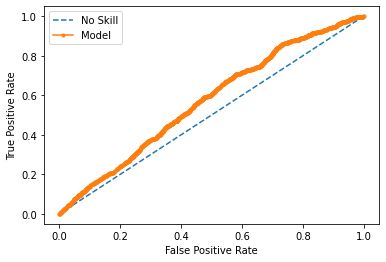

In [70]:
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(mdl_fpr, mdl_tpr, marker='.', label='Model')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Precision between stations

In [42]:
def comparison_between_stations(
    X_test: pd.DataFrame, y_true: np.asarray, y_pred: np.asarray, min_samples: int = 30
):
    """
        Function that returns the precision score for each station

    :param X_test: DataFrame with the test set that we want to use for comparison
    :param y_true: np.array with the true y labels
    :param y_pred: np.array with the predicted y labels
    :param min_samples: minimum samples for the entry to be considered
    :return: sorted dict with the stations and their precisions
    """
    stations = X_test["station"].unique()
    precisions = {}

    # For every station
    for station in stations:

        # Create a mask that filters according to station
        mask = X_test["station"] == station

        # if the dataframe filtered with the mask has more than 30 rows
        if np.sum(mask) > min_samples:
            # generate the dict key with the two classes
            precisions[station] = precision_score(
                y_true[mask], y_pred[mask], pos_label=1
            )
    return dict(sorted(precisions.items(), key=lambda item: item[1]))

In [46]:
precision_per_station = comparison_between_stations(predictions_df, y_test, y_pred)
precision_per_station

{'cambridgeshire': 0.21739130434782608,
 'city-of-london': 0.26912181303116145,
 'nottinghamshire': 0.27486756915832844,
 'durham': 0.64}

### Check discrimination in subgroups (station, ethnicity and gender)

In [84]:
def verify_no_discrimination(
    X_test,
    y_true,
    y_pred,
    sensitive_columns_tuple = ("Officer-defined ethnicity", "Gender"),
    max_diff = 0.05,
    min_samples = 30,
):
    """
            Verifies that no station has discrimination in between protected column tuples (ethnicity, gender)

    :param X_test: DataFrame with the testing data
    :param y_true: np.array with the true labels
    :param y_pred: np.array with the predicted labels
    :param sensitive_columns_tuple: tuple with the sensitive_columns
    :param max_diff: max difference between columns, if greater then there is discrimination
    :param min_samples: minimum nb of samples to be considered
    :return:
    """

    first_sensitive_column, second_sensitive_column = sensitive_columns_tuple

    stations = X_test["station"].unique()
    sensitive_classes = X_test[first_sensitive_column].unique()
    second_sensitive_classes = X_test[second_sensitive_column].unique()

    is_satisfied = True
    problematic_stations = []
    good_stations = []
    ignored_stations = []
    all_precisions = []
    # For every station
    for station in stations:
        precisions = {}
        # For every classes
        for sensitive_class in sensitive_classes:
            for second_sensitive_class in second_sensitive_classes:

                # Create a mask that filters according to class values
                mask = (
                    (X_test[first_sensitive_column] == sensitive_class)
                    & (X_test["station"] == station)
                    & (X_test[second_sensitive_column] == second_sensitive_class)
                )

                # if the dataframe filtered with the mask has more than 30 rows
                if np.sum(mask) > min_samples:

                    # generate the dict key with the two classes
                    key = "{0} - {1}".format(sensitive_class, second_sensitive_class)
                    precisions[key] = precision_score(
                        y_true[mask], y_pred[mask], pos_label=1
                    )

        if len(precisions) > 1:
            diff = np.max(list(precisions.values())) - np.min(list(precisions.values()))

            if diff > max_diff:
                is_satisfied = False
                print(station, diff, precisions)
                problematic_stations.append((station, diff, precisions))
                all_precisions.append(precisions)
            else:
                good_stations.append((station, diff, precisions))
        else:
            ignored_stations.append((station, None, []))

    global_precisions = {}
    for station in stations:
        for sensitive_class in sensitive_classes:
            for second_sensitive_class in second_sensitive_classes:
                mask = (
                    (X_test[first_sensitive_column] == sensitive_class)
                    & (X_test[second_sensitive_column] == second_sensitive_class)
                    & (X_test["station"] == station)
                )

                if np.sum(mask) > min_samples:
                    # key to filter the dictionary
                    key = "{0} - {1}".format(sensitive_class, second_sensitive_class)
                    global_precisions[key] = precision_score(
                        y_true[mask], y_pred[mask], pos_label=1
                    )

    if len(precisions) > 1:
        diff = np.max(list(precisions.values())) - np.min(list(precisions.values()))
        if diff > max_diff:
            is_satisfied = False

    return is_satisfied, problematic_stations, good_stations, global_precisions, all_precisions

In [85]:
(
    is_satisfied,
    problematic_stations,
    good_stations,
    global_precisions,
    all_precisions
) = verify_no_discrimination(predictions_df, y_test, y_pred)

nottinghamshire 0.07299270072992703 {'White - Male': 0.29927007299270075, 'White - Female': 0.25, 'Mixed - Male': 0.22627737226277372, 'Black - Male': 0.26639344262295084, 'Asian - Male': 0.23728813559322035}
city-of-london 0.07250000000000001 {'White - Male': 0.3125, 'White - Female': 0.2857142857142857, 'Black - Male': 0.26732673267326734, 'Asian - Male': 0.24, 'Other - Male': 0.2413793103448276}
durham 0.11544804837822975 {'White - Male': 0.6448598130841121, 'White - Female': 0.5294117647058824}


In [77]:
if not is_satisfied:
    print("Requirement failed 😢")
    print("Global rates: {}".format(global_precisions))
    print("Num problematic departments: {}".format(len(problematic_stations)))
    print("Num good departments: {}".format(len(good_stations)))

Requirement failed 😢
Global rates: {'White - Male': 0.6448598130841121, 'White - Female': 0.5294117647058824, 'Mixed - Male': 0.22627737226277372, 'Black - Male': 0.26732673267326734, 'Asian - Male': 0.24, 'Other - Male': 0.2413793103448276}
Num problematic departments: 3
Num good departments: 0


In [80]:
problematic_stations

[('nottinghamshire',
  0.07299270072992703,
  {'White - Male': 0.29927007299270075,
   'White - Female': 0.25,
   'Mixed - Male': 0.22627737226277372,
   'Black - Male': 0.26639344262295084,
   'Asian - Male': 0.23728813559322035}),
 ('city-of-london',
  0.07250000000000001,
  {'White - Male': 0.3125,
   'White - Female': 0.2857142857142857,
   'Black - Male': 0.26732673267326734,
   'Asian - Male': 0.24,
   'Other - Male': 0.2413793103448276}),
 ('durham',
  0.11544804837822975,
  {'White - Male': 0.6448598130841121, 'White - Female': 0.5294117647058824})]

In [81]:
good_stations

[]

In [86]:
all_precisions

[{'White - Male': 0.29927007299270075,
  'White - Female': 0.25,
  'Mixed - Male': 0.22627737226277372,
  'Black - Male': 0.26639344262295084,
  'Asian - Male': 0.23728813559322035},
 {'White - Male': 0.3125,
  'White - Female': 0.2857142857142857,
  'Black - Male': 0.26732673267326734,
  'Asian - Male': 0.24,
  'Other - Male': 0.2413793103448276},
 {'White - Male': 0.6448598130841121, 'White - Female': 0.5294117647058824}]

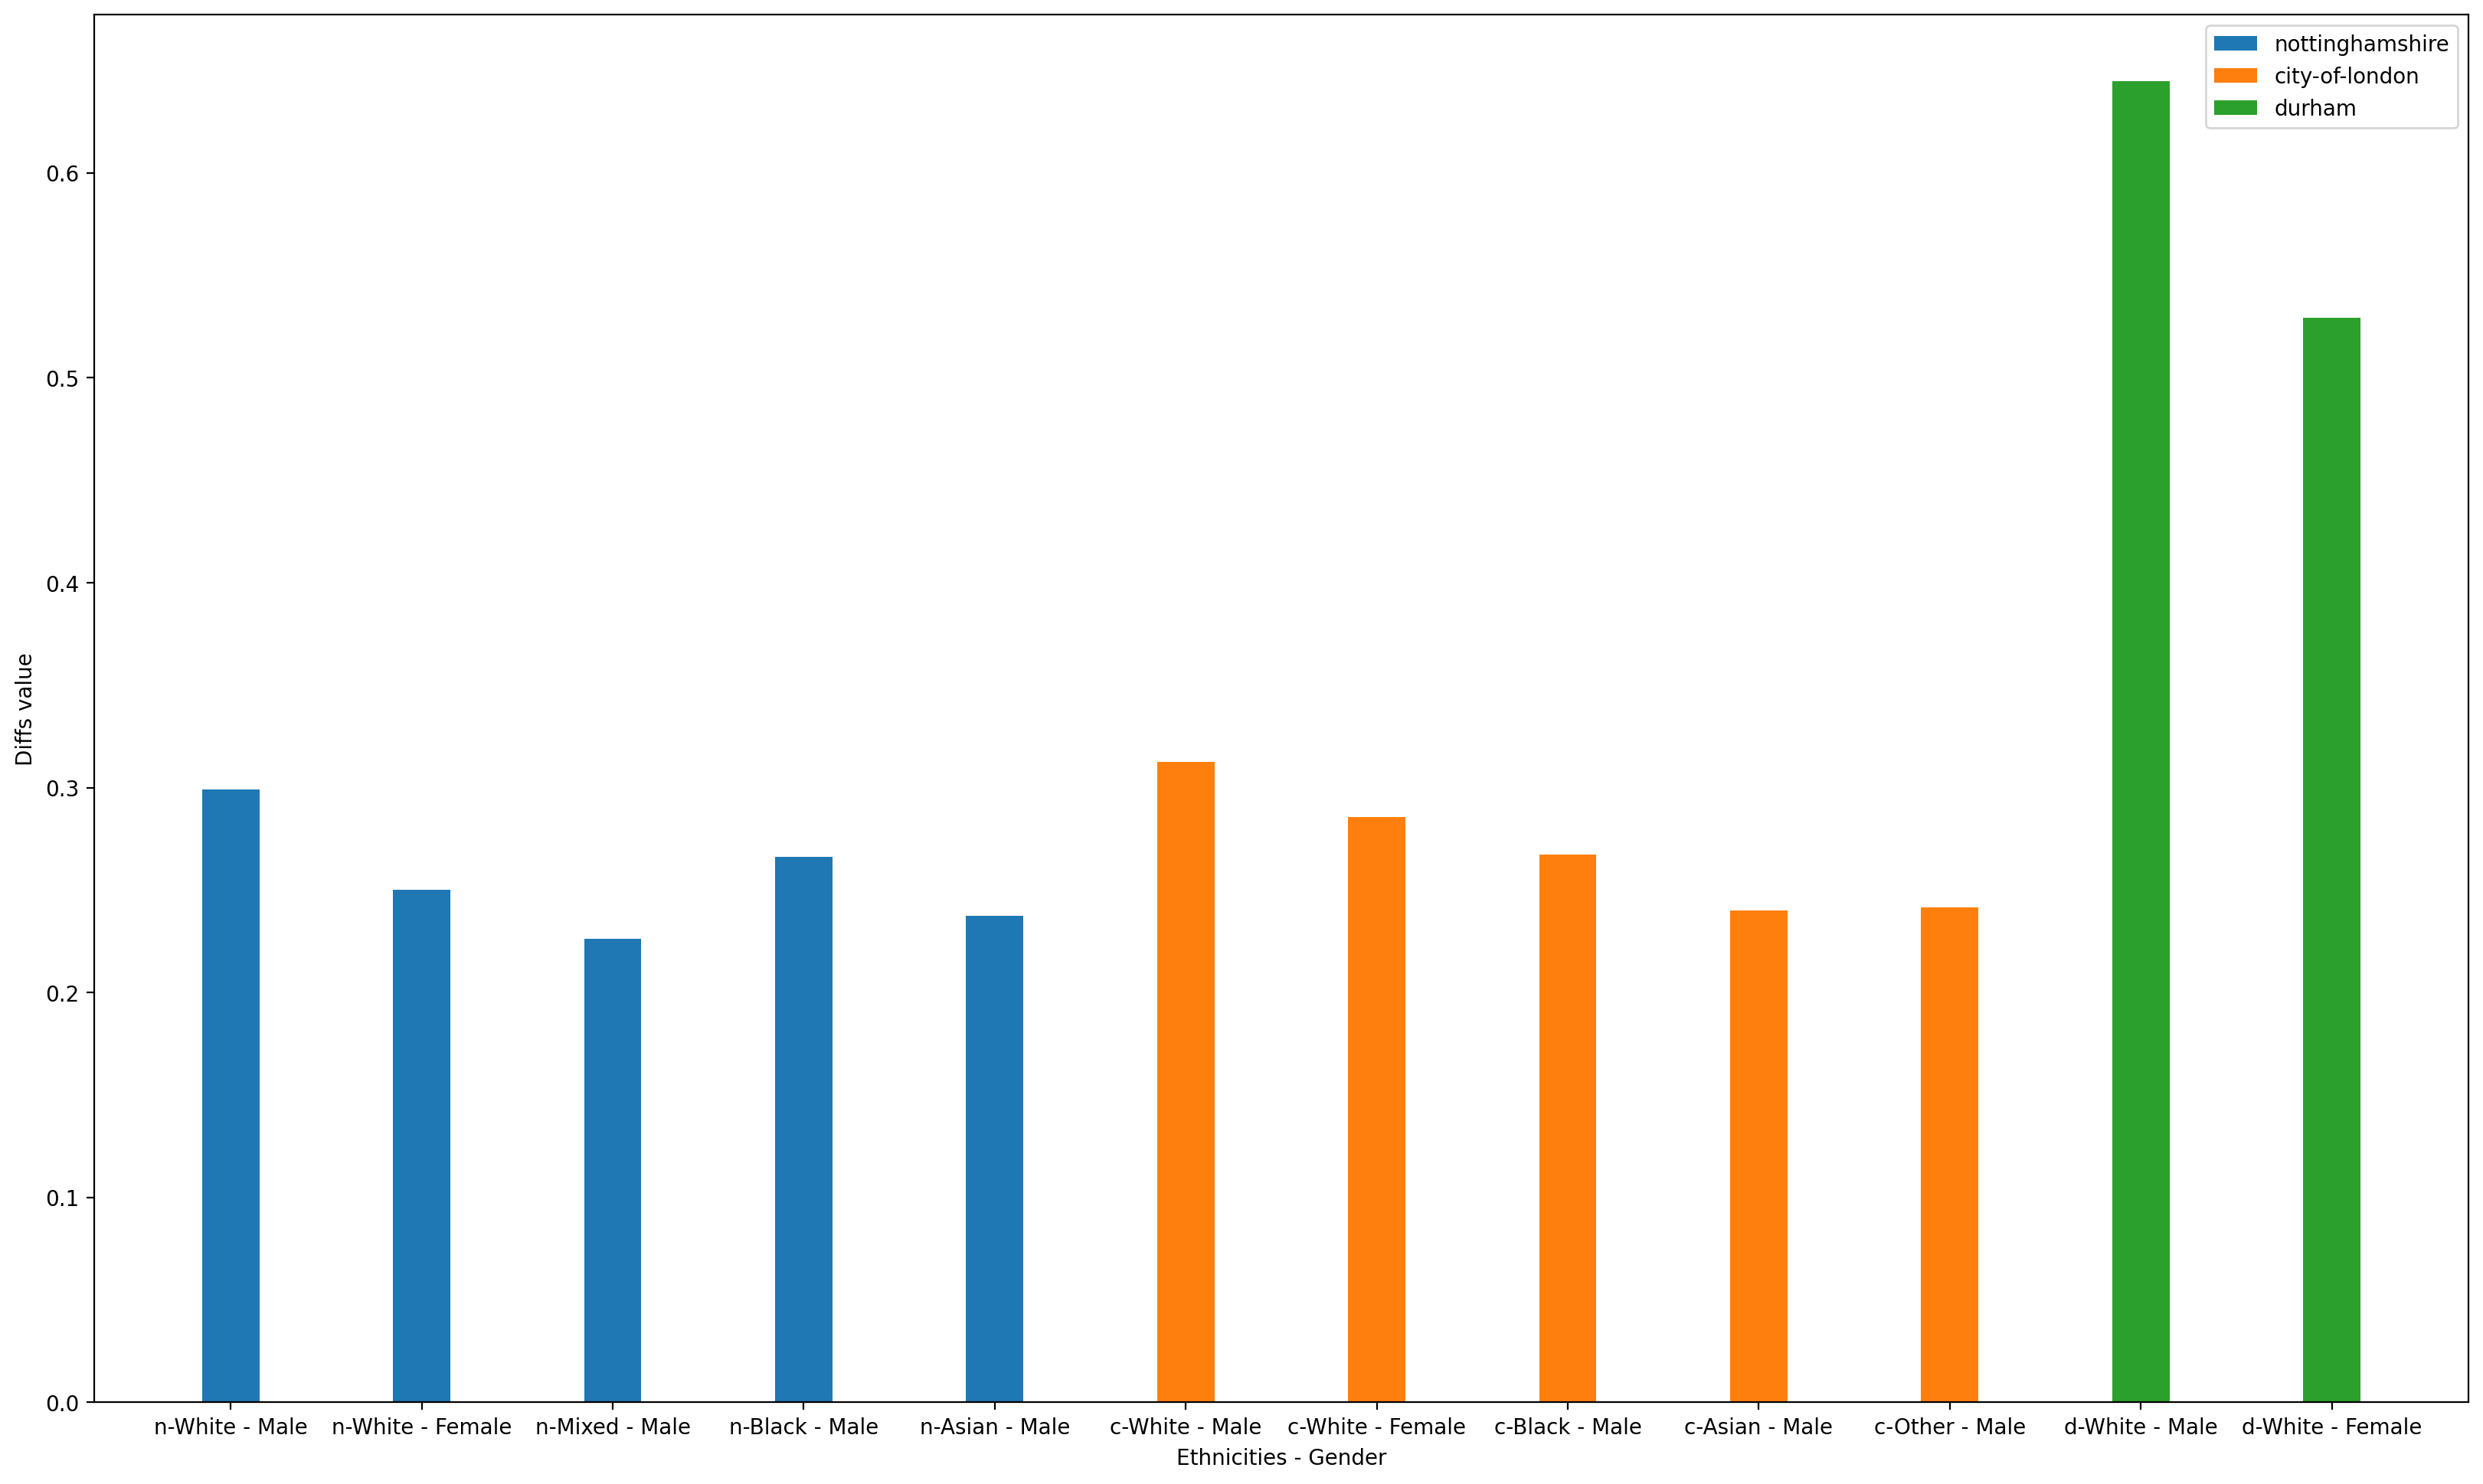

In [147]:
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower
fig, ax = plt.subplots()

stations = []
for details in problematic_stations:
    stations.append(details[0])
    avg_dif = details[1]
    diffs = details[2]
    keys = ["{}-{}".format(details[0][0],key) for key in diffs.keys()]
    plt.bar(keys, diffs.values(), align="center", width=0.3)
    
plt.legend(stations)
plt.ylabel("Diffs value")
plt.xlabel("Ethnicities - Gender")
plt.show()